In [84]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [85]:
tdmb = pd.read_csv("tmdb-movies.csv", encoding= "unicode escape")
tdmb

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10861,21,tt0060371,0.080598,0,0,The Endless Summer,Michael Hynson|Robert August|Lord 'Tally Ho' B...,NaN,Bruce Brown,NaN,...,"The Endless Summer, by Bruce Brown, is one of ...",95,Documentary,Bruce Brown Films,6/15/66,11,7.4,1966,0.000000e+00,0.000000e+00
10862,20379,tt0060472,0.065543,0,0,Grand Prix,James Garner|Eva Marie Saint|Yves Montand|Tosh...,NaN,John Frankenheimer,Cinerama sweeps YOU into a drama of speed and ...,...,Grand Prix driver Pete Aron is fired by his te...,176,Action|Adventure|Drama,Cherokee Productions|Joel Productions|Douglas ...,12/21/66,20,5.7,1966,0.000000e+00,0.000000e+00
10863,39768,tt0060161,0.065141,0,0,Beregis Avtomobilya,Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...,NaN,Eldar Ryazanov,NaN,...,An insurance agent who moonlights as a carthie...,94,Mystery|Comedy,Mosfilm,1/1/66,11,6.5,1966,0.000000e+00,0.000000e+00
10864,21449,tt0061177,0.064317,0,0,"What's Up, Tiger Lily?",Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|Joh...,NaN,Woody Allen,WOODY ALLEN STRIKES BACK!,...,"In comic Woody Allen's film debut, he took the...",80,Action|Comedy,Benedict Pictures Corp.,11/2/66,22,5.4,1966,0.000000e+00,0.000000e+00


In [86]:
tdmb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [87]:
tdmb.nunique()

id                      10865
imdb_id                 10855
popularity              10814
budget                    557
revenue                  4702
original_title          10571
cast                    10719
homepage                 2896
director                 5067
tagline                  7997
keywords                 8804
overview                10847
runtime                   247
genres                   2039
production_companies     7445
release_date             5909
vote_count               1289
vote_average               72
release_year               56
budget_adj               2614
revenue_adj              4840
dtype: int64

In [88]:
tdmb.duplicated().sum()

1

In [89]:
tdmb.drop_duplicates(inplace = True)

In [90]:
tdmb.duplicated().sum()

0

In [91]:
tdmb.drop(columns = ['id', 'imdb_id', 'homepage', 'revenue_adj', 'budget_adj', 'tagline', 'cast', 
                      'overview', 'keywords', 'production_companies', 'director', 'release_date'],axis = 1, inplace = True)

In [92]:
tdmb.isnull().sum()

popularity         0
budget             0
revenue            0
original_title     0
runtime            0
genres            23
vote_count         0
vote_average       0
release_year       0
dtype: int64

In [93]:
tdmb.dropna(inplace =  True)

In [94]:
tdmb.shape

(10842, 9)

In [95]:
tdmb["profit"] = tdmb["revenue"]-tdmb["budget"]

In [96]:
tdmb["genres"] =tdmb["genres"].apply(lambda x:x.split("|")[0])

In [97]:
tdmb.head()

,popularity,budget,revenue,original_title,runtime,genres,vote_count,vote_average,release_year,profit
0,32.985763,150000000,1513528810,Jurassic World,124,Action,5562,6.5,2015,1363528810
1,28.419936,150000000,378436354,Mad Max: Fury Road,120,Action,6185,7.1,2015,228436354
2,13.112507,110000000,295238201,Insurgent,119,Adventure,2480,6.3,2015,185238201
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,136,Action,5292,7.5,2015,1868178225
4,9.335014,190000000,1506249360,Furious 7,137,Action,2947,7.3,2015,1316249360


In [98]:
tdmb["vote_avg_categorize"] = tdmb["vote_average"]

In [99]:
tdmb.columns

Index(['popularity', 'budget', 'revenue', 'original_title', 'runtime',
       'genres', 'vote_count', 'vote_average', 'release_year', 'profit',
       'vote_avg_categorize'],
      dtype='object')

In [100]:
def categorize_col(ds, col, labels):
    ds[col] = pd.qcut(ds[col],q=4,labels=labels, duplicates="drop")
    return ds

In [101]:
labels = ["not popular", "below average", "average", "popular"]
categorize_col(tdmb, "vote_avg_categorize", labels)
tdmb["vote_avg_categorize"].unique()

['average', 'popular', 'below average', 'not popular']
Categories (4, object): ['not popular' < 'below average' < 'average' < 'popular']

In [102]:
tdmb["profit_category"] = tdmb["profit"]

In [103]:
labels = ["low", "avg", "high"]
categorize_col(tdmb,"profit_category",labels)
tdmb["profit_category"].unique()

['high', 'avg', 'low']
Categories (3, object): ['low' < 'avg' < 'high']

## Q1: Do movies with high popularity achive high revenvue?

In [104]:
tdmb["popularity"].mean()

0.6474605913115661

In [108]:
lower_popularity = tdmb.query("popularity<=0.647")
high_popularity = tdmb.query("popularity>0.647")

In [110]:
print(lower_popularity.revenue.mean(), high_popularity.revenue.mean())

7688284.572327852 121933819.08567691


## From the above calculations, it's very clear that more popular movies recieve way more revenue than the less popular movies.

### Q2: What are the most filmed genres in this whole dataset?

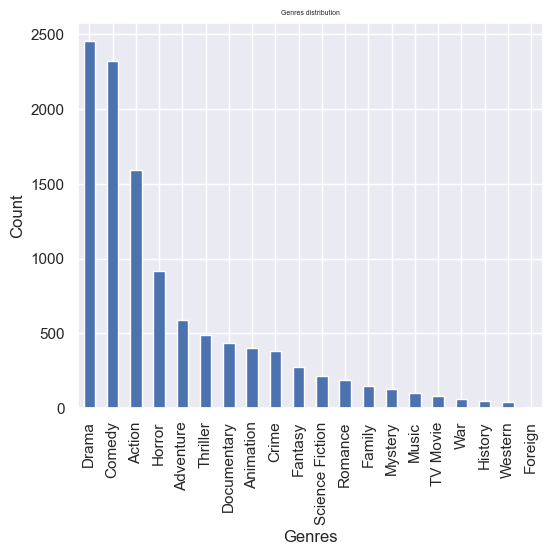

In [130]:
tdmb["genres"].value_counts().plot(kind= "bar")
plt.title("Genres distribution", fontsize = 5)
sb.set(rc = {"figure.figsize" : (15,5)})
plt.xlabel("Genres")
plt.ylabel("Count")
plt.show()

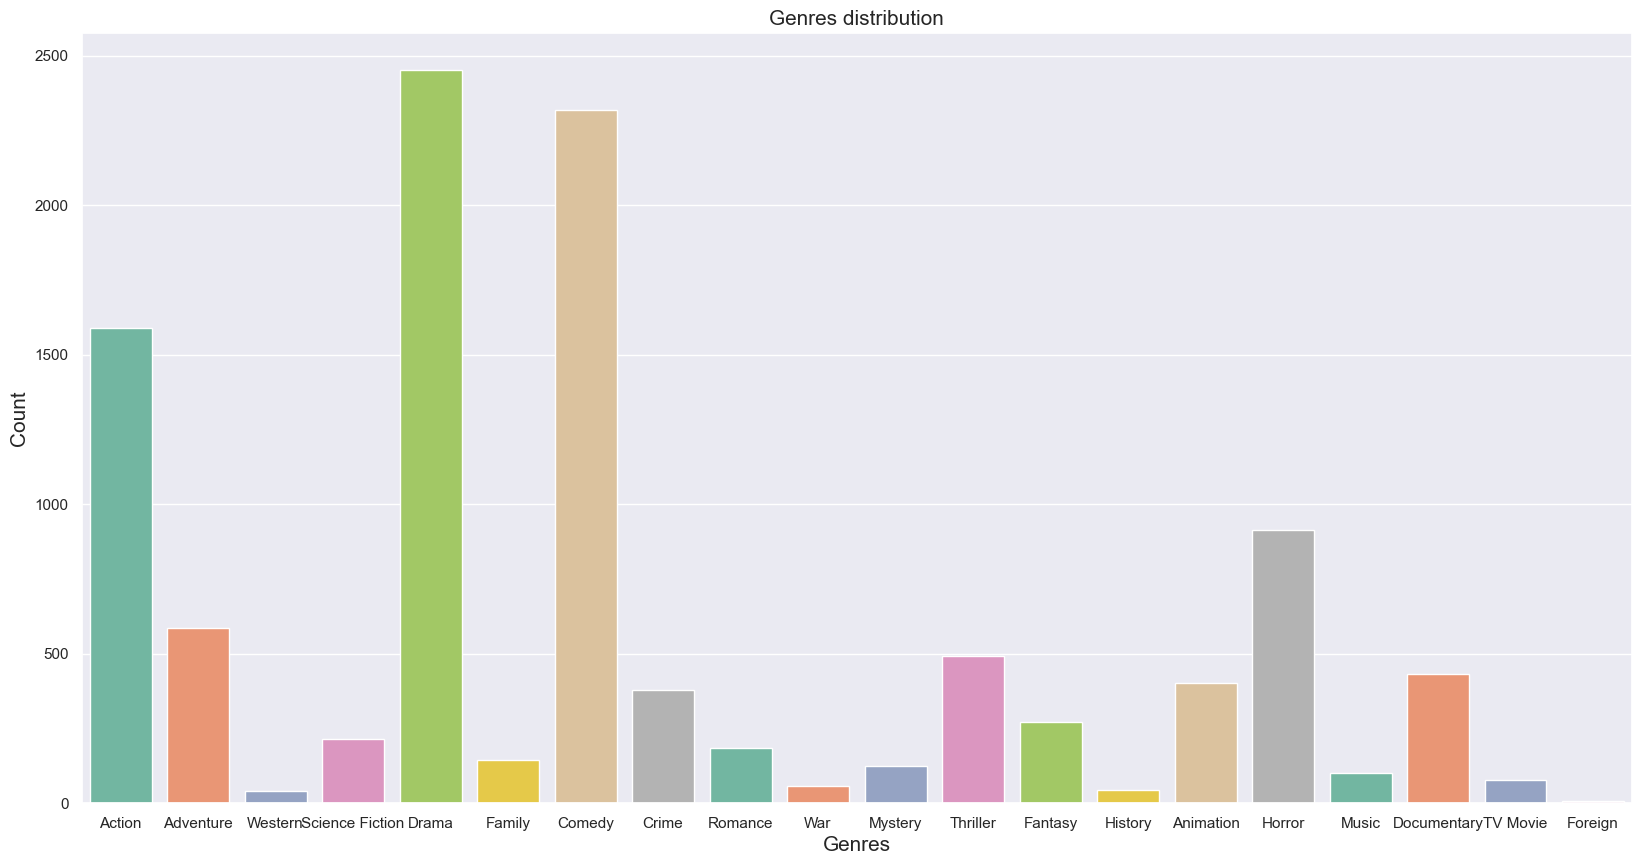

In [144]:
sb.set(rc = {"figure.figsize" : (20,10)})
sb.countplot(data= tdmb,x= "genres", palette="Set2")
plt.xlabel("Genres", fontsize=15)
plt.ylabel("Count", fontsize=15)
plt.title("Genres distribution", fontsize = 15)
plt.show()

In [147]:
tdmb["genres"].describe()

count     10842
unique       20
top       Drama
freq       2453
Name: genres, dtype: object

### from the above graph, we can see that `Drama`, `Comedy` and `Action` are the most three filmed genres in total of 10839 movies in our dataset, and that `Drama` genre is filmed 22.6% of the times on our dataset.

## Q3) Is there a correlation between a movie budget and its revenue?

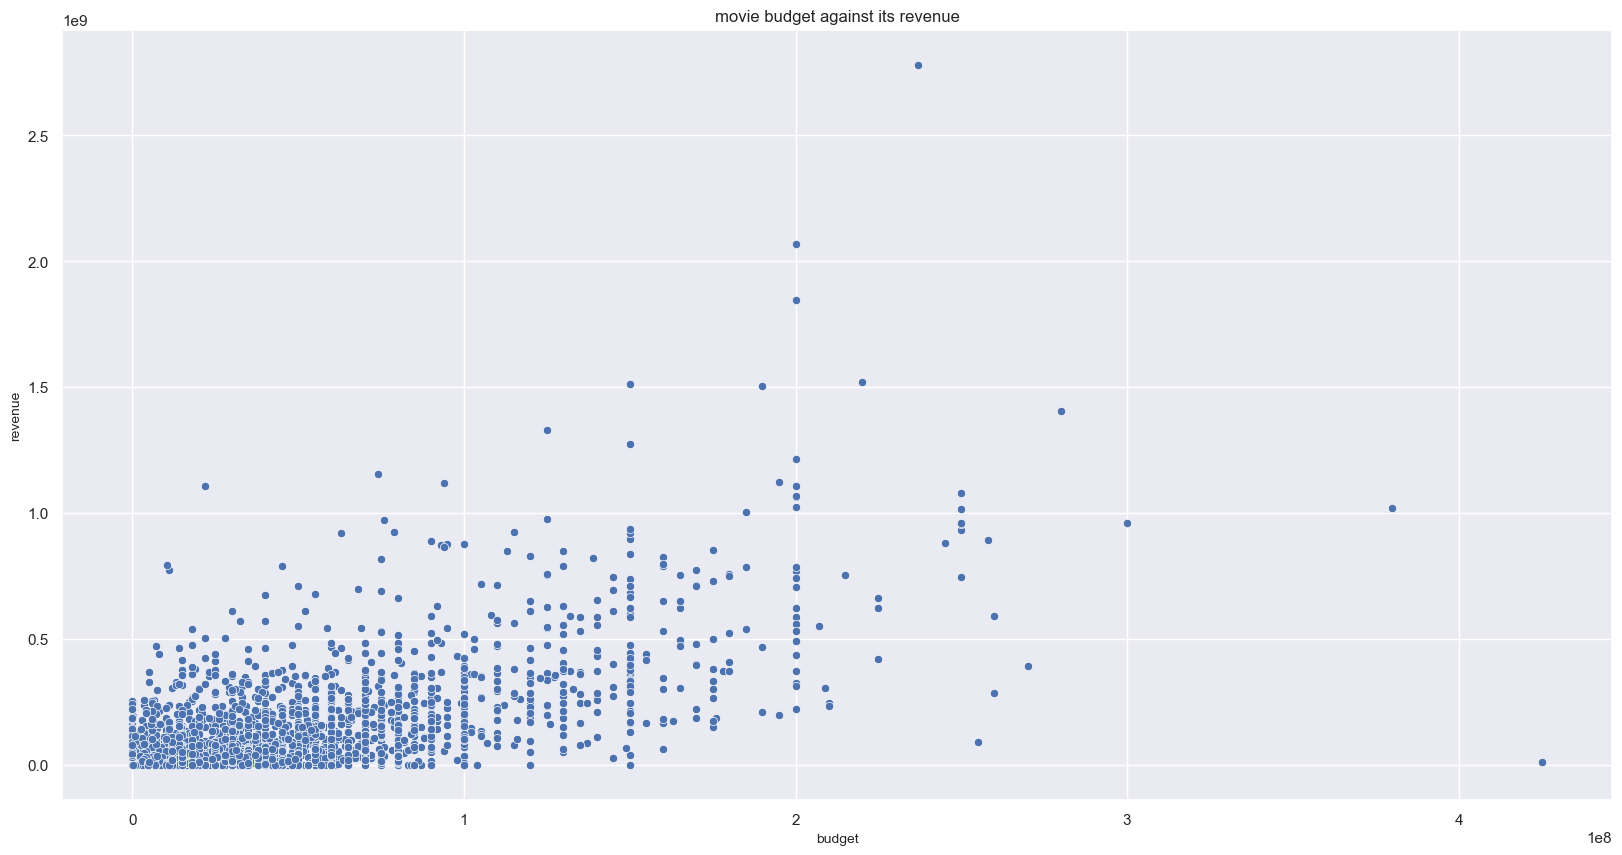

In [150]:
sb.scatterplot(x = "budget", y = "revenue", data = tdmb)
plt.title("movie budget against its revenue");
plt.xlabel('budget', fontsize=10);
plt.ylabel('revenue',fontsize=10);
plt.show()

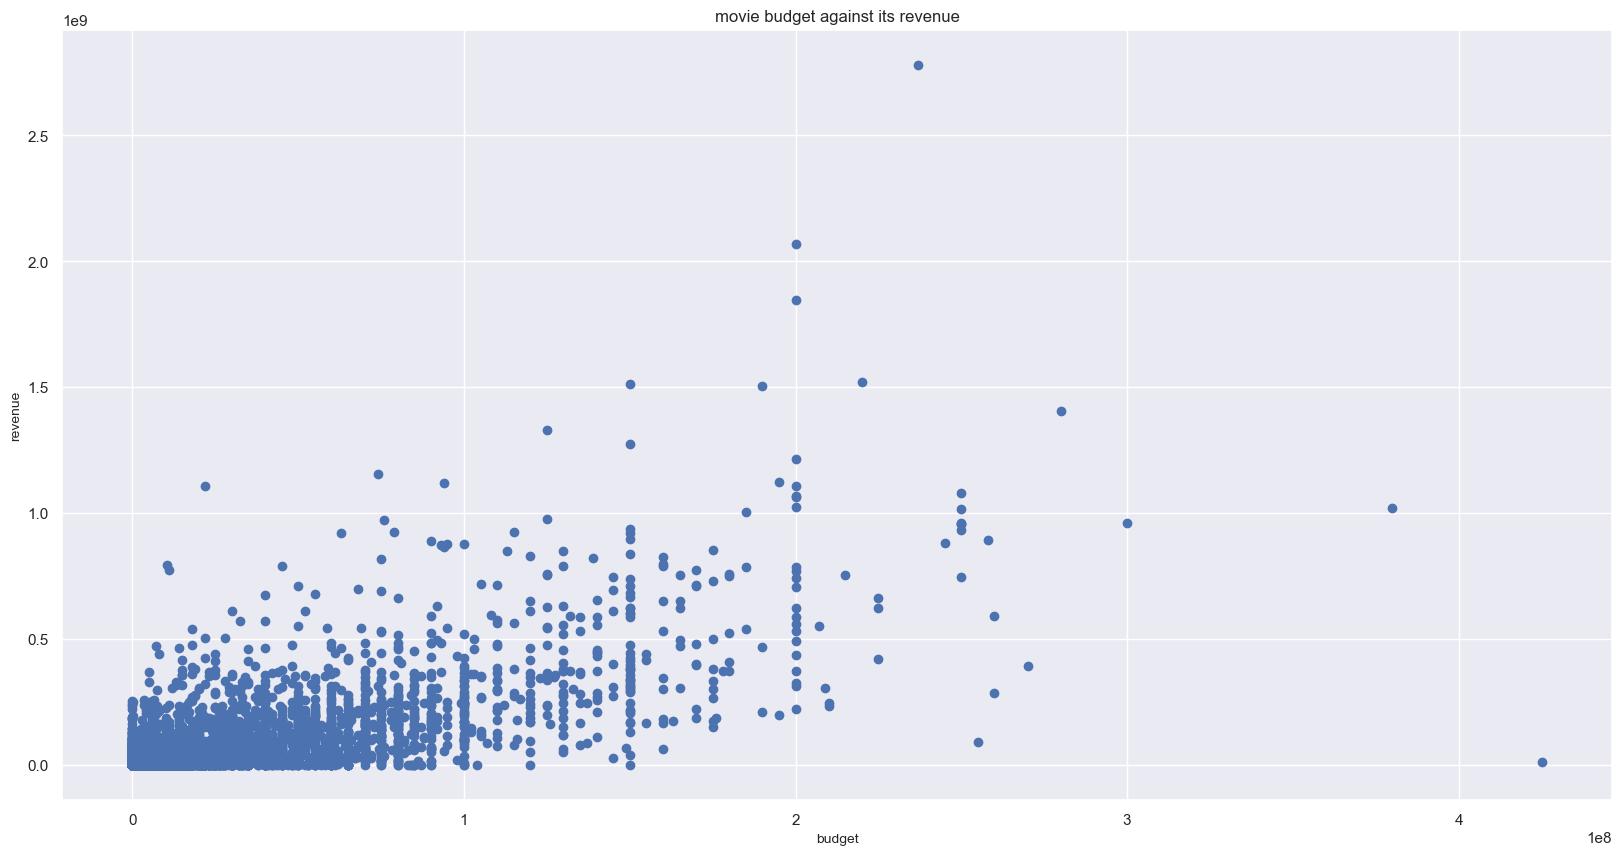

In [152]:
plt.scatter(tdmb["budget"], tdmb["revenue"])
plt.title("movie budget against its revenue");
plt.xlabel('budget', fontsize=10);
plt.ylabel('revenue',fontsize=10);
plt.show()

### We can notice the positive correlation between `budget` and `revenue`, indecating a relation between them with little outliers. 
___